# Import Packages

In [47]:
#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import glob
%matplotlib inline

# Calibrate Camera

In [48]:
# Let's import all calibration images and produce objectpoints and image points
images = glob.glob('camera_cal/calibration*.jpg')

objpoints = []
imgpoints = []

objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1, 2)

for fname in images:
    img = mpimg.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    
    ret, corners = cv2.findChessboardCorners(gray, (9, 6), None)
    
    if ret == True:
        imgpoints.append(corners)
        objpoints.append(objp)
        
# imgpoints = np.concatenate(imgpoints)
# objpoints = np.concatenate(objpoints)

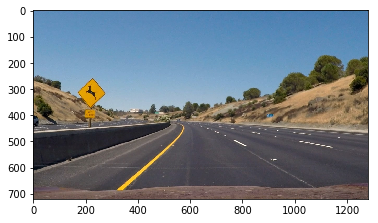

In [49]:
# Let's show one chessboard before calibration
test_img = mpimg.imread('test_images/test2.jpg')
plt.imshow(test_img)

In [50]:
# Let's calibrate camera using objectpoints and imagepoints
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, test_img.shape[1::-1], None, None)

# Undistort image

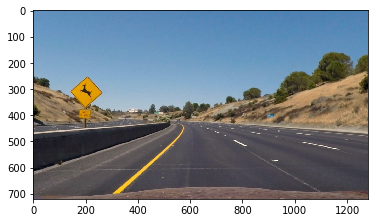

In [51]:
# Let's undistort the test image
def undistort(img):
    return cv2.undistort(img, mtx, dist, None, mtx)

undistorted_test_img = undistort(test_img)
plt.imshow(undistorted_test_img)

# Threshold an image

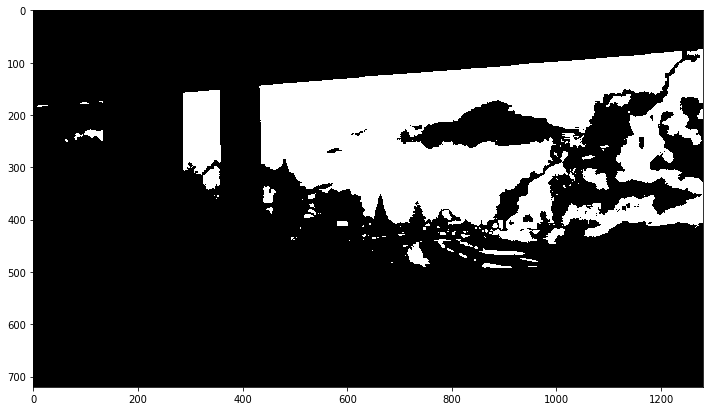

In [274]:
def threshold_image(img):
#    equ = np.copy(img)
#     equ[:,:,0] = cv2.equalizeHist(img[:,:,0])
#     equ[:,:,1] = cv2.equalizeHist(img[:,:,1])
#     equ[:,:,2] = cv2.equalizeHist(img[:,:,2])

    #gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    margin = 70
    yellow_low = 15
    yellow_high = 35
    hls[np.where(hls[:,:,1] > 255 - margin)] = [255, 255, 255]
    hls[np.where((hls[:,:,0] >= yellow_low) & (hls[:,:,0] <= yellow_high) & (hls[:,:,2] >= 100))] = [25, 128, 255]
    
    #hsv = cv2.cvtColor(equ, cv2.COLOR_RGB2HSV)
    rgb = cv2.cvtColor(hls, cv2.COLOR_HLS2RGB)
    hsv = cv2.cvtColor(rgb, cv2.COLOR_RGB2HSV)
    
    S = hls[:,:,2]
    V = hsv[:,:,2]
    
    #TODO: Apply y sobel and filter out by gradint direction
    # TODO: Try different color spaces. For example HSV.
    # TODO: Try gradient filtering on Value channel
    # Sobel x
#     sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0) # Take the derivative in x
#     sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1) # Take the derivative in y
#     abs_sobelx = np.absolute(sobelx) # Absolute x derivative to accentuate lines away from horizontal
#     abs_sobely = np.absolute(sobely) # Absolute x derivative to accentuate lines away from horizontal
#     direction = np.arctan2(sobely, sobelx)
#     direction = np.absolute(direction)

#     magnitude = np.sqrt(np.square(sobelx)+np.square(sobely))
#     magnitude = np.uint8(255*magnitude/np.max(magnitude))


#     scaled_sobelx = np.uint8(255*abs_sobelx/np.max(abs_sobelx))
#     scaled_sobely = np.uint8(255*abs_sobely/np.max(abs_sobely))

    # Threshold x gradient
    # thresh_min = 5
    # thresh_max = 255
    # sxbinary = np.zeros_like(scaled_sobel)
    # sxbinary[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1

    # Threshold gradient magnitude
#     thresh_min = 10
#     thresh_max = 255
#     mag_binary = np.zeros_like(magnitude)
#     mag_binary[(magnitude >= thresh_min) & (magnitude <= thresh_max)] = 1

#     # Threshold gradient direction
#     thresh = (1.8, 2.4)
#     grad_binary = np.zeros_like(direction)
#     grad_binary[(direction >= thresh[0]) & (direction <= thresh[1])] = 1


#     mag_grad_binary = np.zeros_like(grad_binary)
#     mag_grad_binary[(grad_binary == 1) & (mag_binary == 1)] = 1

    #plt.imshow(grad_binary, cmap='gray')

    # Threshold S channel
#     s_thresh_min = 80
#     s_thresh_max = 255
#     s_binary = np.zeros_like(S)
#     s_binary[(S >= s_thresh_min) & (S <= s_thresh_max)] = 1

    # Threshold V channel
    v_thresh_min = np.percentile(V, 90)
    v_thresh_max = 255
    #print("Threshold is: ",(v_thresh_min, v_thresh_max))
    v_binary = np.zeros_like(V)
    v_binary[(V >= v_thresh_min) & (V <= v_thresh_max)] = 1

    # Stack each channel to view their individual contributions in green and blue respectively
    # This returns a stack of the two binary images, whose components you can see as different colors
    #color_binary = np.dstack(( np.zeros_like(sxbinary), sxbinary, s_binary)) * 255

    # Combine the two binary thresholds
    #combined_binary = np.zeros_like(sxbinary)
    #combined_binary[(s_binary == 1) & (grad_binary == 1)] = 1

    #plt.imshow(combined_binary, cmap='gray')
    #return v_binary
    
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    
    margin = 70
    yellow_low = 15
    yellow_high = 35
    value_threshold = np.percentile(hls[:,:,1], 80)

    H = hsv[:,:,0]
    S = hsv[:,:,1]
    V = hsv[:,:,2]
    binary_mask = np.zeros_like(V)
    binary_mask[np.where(hls[:,:,1] > 255 - margin)] = 255
    binary_mask[np.where((hsv[:,:,0] >= yellow_low) & (hsv[:,:,0] <= yellow_high) & (hsv[:,:,2] >= value_threshold) & (hsv[:,:,1] >= 50))] = 255
    
    
    lab = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)
    ycb = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)

    L = lab[:,:,0]
    A = lab[:,:,1]
    B = lab[:,:,2]

    Y = ycb[:,:,0]
    Cr = ycb[:,:,1]
    Cb = ycb[:,:,2]

    height = Y.shape[0]
    B_threshold = np.percentile(B[(int)(height/2):height,:], 97)
    yellow_mask = np.zeros_like(B)
    yellow_mask[B>=B_threshold] = 1

    Y_threshold = np.percentile(Y[(int)(height/2):height,:], 97)
    white_mask = np.zeros_like(Y)
    white_mask[Y>=Y_threshold] = 1
    
    
    return yellow_mask | white_mask
    

test_img = mpimg.imread('debug/challenge_debug_18.jpg')
#test_img = mpimg.imread('test_images/test6.jpg')
test_img = undistort(test_img)

plt.figure(figsize=(12,12))
plt.imshow(threshold_image(test_img), cmap='gray')

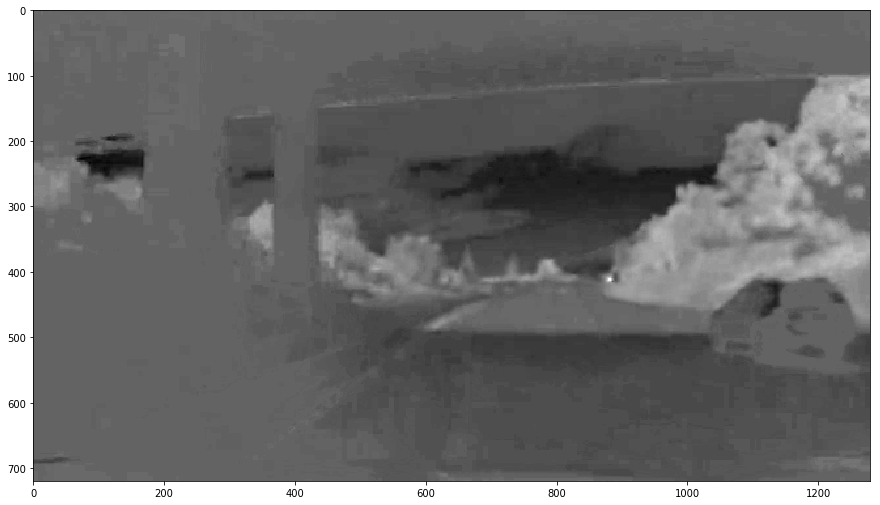

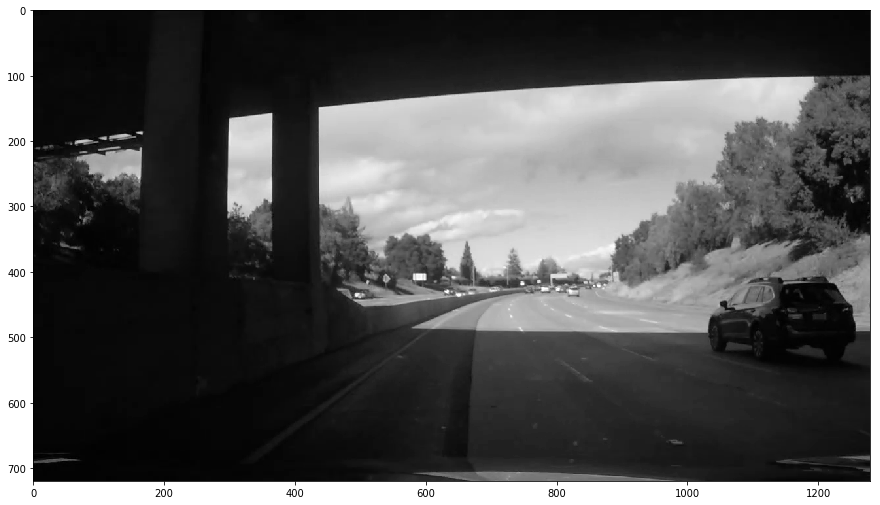

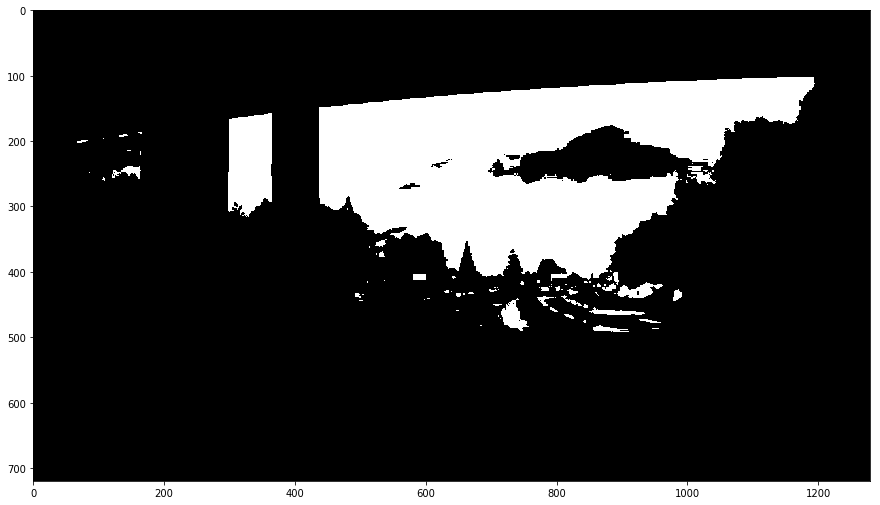

In [276]:
img = mpimg.imread('debug/challenge_debug_18.jpg')
#img = mpimg.imread('test_images/test1.jpg')

# img[:,:,0] = cv2.equalizeHist(img[:,:,0])
# img[:,:,1] = cv2.equalizeHist(img[:,:,1])
# img[:,:,2] = cv2.equalizeHist(img[:,:,2])

lab = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)
ycb = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)

L = lab[:,:,0]
A = lab[:,:,1]
B = lab[:,:,2]

Y = ycb[:,:,0]
Cr = ycb[:,:,1]
Cb = ycb[:,:,2]

#Y = cv2.equalizeHist(Y)

# plt.figure(figsize=(15, 15))
# plt.imshow(L, cmap='gray')

# plt.figure(figsize=(15, 15))
# plt.imshow(A, cmap='gray')

plt.figure(figsize=(15, 15))
plt.imshow(B, cmap='gray')

plt.figure(figsize=(15, 15))
plt.imshow(Y, cmap='gray')

# plt.figure(figsize=(15, 15))
# plt.imshow(Cr, cmap='gray')

# plt.figure(figsize=(15, 15))
# plt.imshow(Cb, cmap='gray')

# height = Y.shape[0]
# B_threshold = np.percentile(B[(int)(height/2):height,:], 97)
# mask = np.zeros_like(B)
# mask[B>=B_threshold] = 1

height = Y.shape[0]
Y_threshold = np.percentile(Y[(int)(height/2):height,:], 97)
mask = np.zeros_like(Y)
mask[Y>=Y_threshold] = 1
plt.figure(figsize=(15, 15))
plt.imshow(mask, cmap='gray')

Value threshold:  178.0
249.0


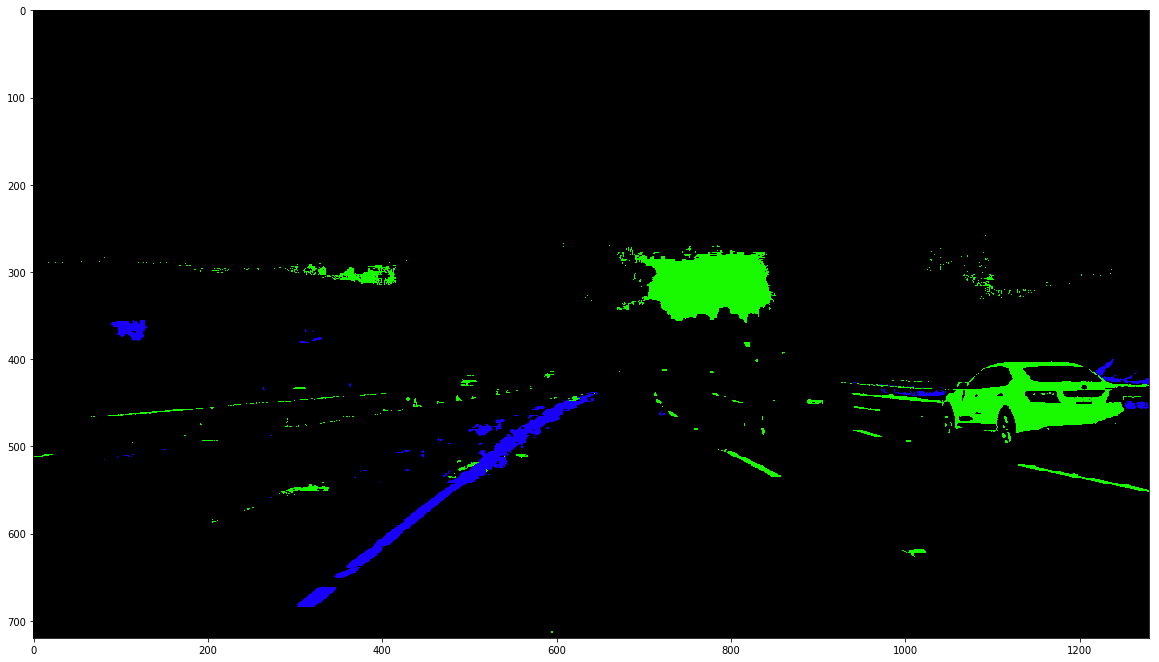

In [165]:
# Color enhancement experiments
#img = mpimg.imread('debug/challenge_debug_20.jpg')
img = mpimg.imread('test_images/test4.jpg')

# img[:,:,0] = cv2.equalizeHist(img[:,:,0])
# img[:,:,1] = cv2.equalizeHist(img[:,:,1])
# img[:,:,2] = cv2.equalizeHist(img[:,:,2])


hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

margin = 50
yellow_low = 15
yellow_high = 35
value_threshold = np.percentile(hls[:,:,1], 80)

print("Value threshold: ", value_threshold)
binary_mask = np.zeros_like(hsv)
binary_mask[np.where(hls[:,:,1] > 255 - margin)] = [25, 250, 0]
binary_mask[np.where((hsv[:,:,0] >= yellow_low) & (hsv[:,:,0] <= yellow_high) & (hsv[:,:,2] >= value_threshold) & (hsv[:,:,1] >= 50))] = [25, 0, 250]
# hls[np.where(hls[:,:,1] > 255 - margin)] = [255, 255, 255]
# hsv[np.where((hsv[:,:,0] >= yellow_low) & (hsv[:,:,0] <= yellow_high) & (hsv[:,:,2] >= value_threshold) & (hsv[:,:,1] >= 30))] = [25, 255, 255]


plt.figure(figsize=(20, 20))
plt.imshow(binary_mask)

# rgb = cv2.cvtColor(hls, cv2.COLOR_HLS2RGB)
# plt.figure(figsize=(20, 20))
# plt.imshow(rgb)

# 
# mask = cv2.inRange(hls, (0, 255-margin, 0), (180, 255, 255))
# np.array(mask).shape
# gray[mask>0] = 255
# plt.figure(figsize=(12, 12))
# plt.imshow(gray, cmap='gray')


# TODO: Try to increase value in hsv color range if mean value is relatively low. Also consider only lower part of the image
# TODO: Area with low gradient should go away
# Let's add white selection and figure out yellow selection
#hsv[:,:,2] = 
# Look at other color channels
equ = np.copy(img)
equ[:,:,0] = cv2.equalizeHist(img[:,:,0])
equ[:,:,1] = cv2.equalizeHist(img[:,:,1])
equ[:,:,2] = cv2.equalizeHist(img[:,:,2])
#plt.imshow(equ)

hsv = cv2.cvtColor(equ, cv2.COLOR_RGB2HSV)
percentile = np.percentile(hsv[:,:,2], 95)
print(percentile)
#plt.imshow(hsv[:,:,2], cmap='gray')

# Perspective Transform

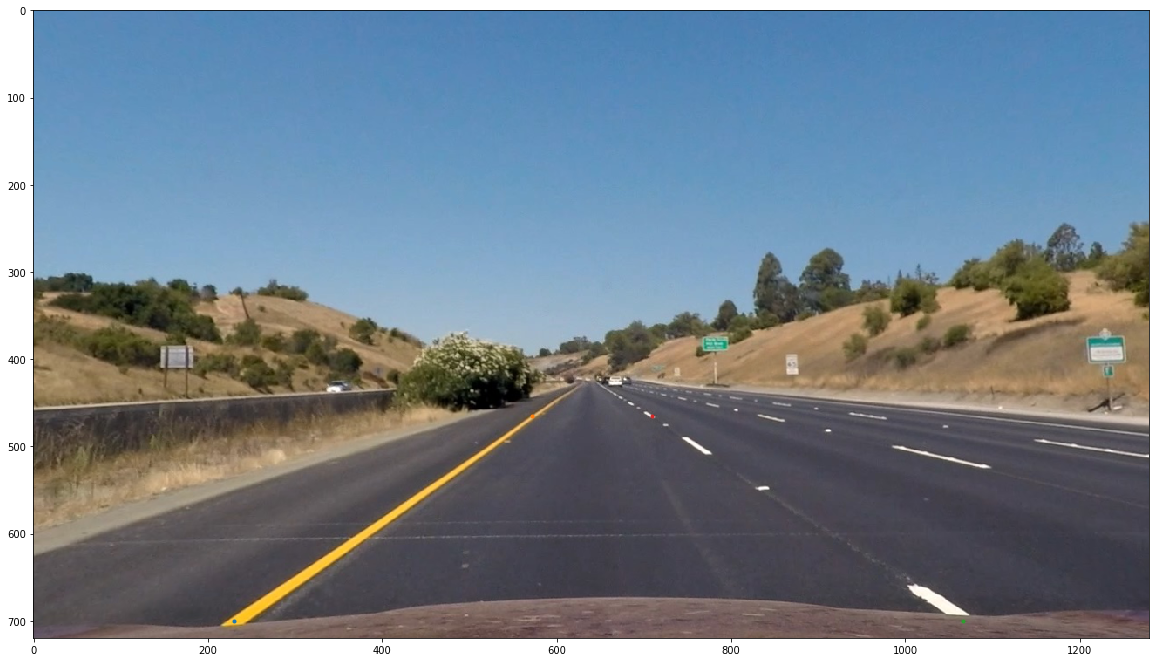

In [277]:
img = mpimg.imread('test_images/straight_lines1_undist.jpg')
#img = undistort(img)
#mpimg.imsave('test_images/straight_lines1_undist.jpg', img)
plt.figure(figsize=(20,20))
plt.imshow(img)
plt.plot(230, 700, '.')
plt.plot(572, 465, '.')
plt.plot(1066, 700, '.')
plt.plot(709, 465, '.')

width = img.shape[1]
height = img.shape[0]
img_size = (width, height)

src = np.float32([[230, 700], [502, 514], [783, 514], [1066, 700]])
left_margin = 200
bottom_margin = 0
top_margin = 500
dst = np.float32([[left_margin, height-bottom_margin], [left_margin, top_margin], [width-left_margin, top_margin], [width-left_margin, height-bottom_margin]])
M = cv2.getPerspectiveTransform(src, dst)
Minv = cv2.getPerspectiveTransform(dst, src)


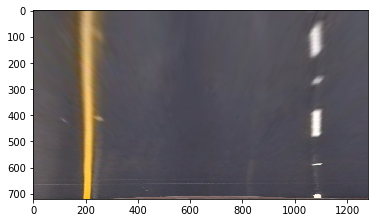

In [278]:
warped = cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_LINEAR)
plt.imshow(warped)

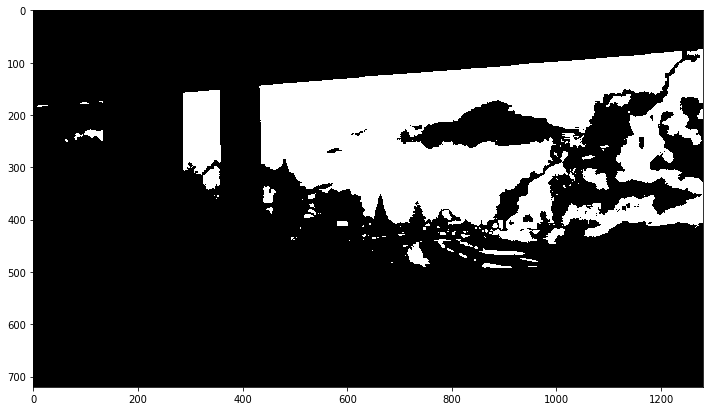

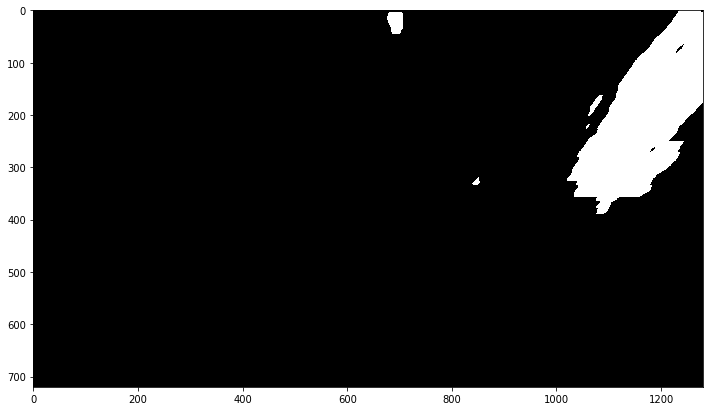

In [279]:
#img = mpimg.imread('test_images/test6.jpg')
img = mpimg.imread('debug/challenge_debug_18.jpg')
img = undistort(img)
img = threshold_image(img)
plt.figure(figsize=(12,12))
plt.imshow(img, cmap='gray')

warped = cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_LINEAR)
plt.figure(figsize=(12,12))
plt.imshow(warped, cmap='gray')

In [57]:
def preprocess(img):
    undist = undistort(img)
    binary = threshold_image(undist)
    warped = cv2.warpPerspective(binary, M, img_size, flags=cv2.INTER_LINEAR)
    warped = np.uint8(warped*255)
    return warped, undist

# Extract lane pixels

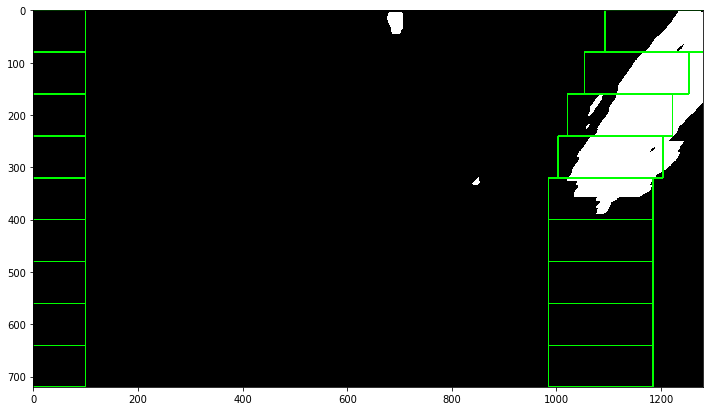

In [280]:
def getInitialCenters(img):
    height = img.shape[0]
    bottom_quarter = img[int(3*height/4):height,:]
    bottom_half = img[int(height/2):height,:]
    histogram = np.sum(bottom_half, axis=0)
#    plt.plot(histogram)
    midpoint = np.int(histogram.shape[0]//2)
    leftx_base = np.argmax(histogram[:midpoint])
    rightx_base = np.argmax(histogram[midpoint:]) + midpoint
    return (leftx_base, rightx_base)

def get_lane_pixels(img):
    leftx_current, rightx_current = getInitialCenters(img)
    
    out_img = np.dstack((img, img, img))
    #plt.figure(figsize=(12, 12))
    #plt.imshow(out_img)
    # HYPERPARAMETERS
    # Choose the number of sliding windows
    nwindows = 9
    # Set the width of the windows +/- margin
    margin = 100
    # Set minimum number of pixels found to recenter window
    minpix = 50
    
    window_height = np.int(img.shape[0]//nwindows)
    # Identify the x and y positions of all nonzero pixels in the image
    nonzero = img.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])

    # Create empty lists to receive left and right lane pixel indices
    # left_lane_inds = []
    # right_lane_inds = []
    
    left_lane_xs = []
    left_lane_ys = []
    right_lane_xs = []
    right_lane_ys = []
    
    #print(nonzerox)
    #print(nonzeroy)
    # Step through the windows one by one
    for window in range(nwindows):
        # Identify window boundaries in x and y (and right and left)
        win_y_low = img.shape[0] - (window+1)*window_height
        win_y_high = img.shape[0] - window*window_height
        ### TO-DO: Find the four below boundaries of the window ###
        win_xleft_low = leftx_current - margin  # Update this
        win_xleft_high = leftx_current + margin  # Update this
        win_xright_low = rightx_current - margin  # Update this
        win_xright_high = rightx_current + margin  # Update this
        
        # Draw the windows on the visualization image
        cv2.rectangle(out_img,(win_xleft_low,win_y_low),
        (win_xleft_high,win_y_high),(0,255,0), 2) 
        cv2.rectangle(out_img,(win_xright_low,win_y_low),
        (win_xright_high,win_y_high),(0,255,0), 2) 
        
        win_image_left = img[win_y_low:win_y_high,win_xleft_low:win_xleft_high]
        win_image_right = img[win_y_low:win_y_high,win_xright_low:win_xright_high]
        ### TO-DO: Identify the nonzero pixels in x and y within the window ###
        good_left_inds = win_image_left.nonzero()
        good_right_inds = win_image_right.nonzero()
        
        # Append these indices to the lists
        left_lane_ys.append(good_left_inds[0]+win_y_low)
        left_lane_xs.append(good_left_inds[1]+win_xleft_low)
        right_lane_ys.append(good_right_inds[0]+win_y_low)
        right_lane_xs.append(good_right_inds[1]+win_xright_low)
        
        ### TO-DO: If you found > minpix pixels, recenter next window ###
        ### (`right` or `leftx_current`) on their mean position ###
        if good_left_inds[1].shape[0] > minpix:
            #print("Before: " + str(leftx_current))
            leftx_current = int(np.mean(good_left_inds[1]))+win_xleft_low
            #print("After: " + str(leftx_current))
            
        if good_right_inds[1].shape[0] > minpix:
            #print("Before: " + str(rightx_current))
            rightx_current = int(np.mean(good_right_inds[1]))+win_xright_low
            #print("After: " + str(rightx_current))

    #Concatenate the arrays of indices (previously was a list of lists of pixels)
    left_lane_ys = np.concatenate(left_lane_ys)
    left_lane_xs = np.concatenate(left_lane_xs)
    right_lane_ys = np.concatenate(right_lane_ys)
    right_lane_xs = np.concatenate(right_lane_xs)

    # Extract left and right line pixel positions
    # leftx = nonzerox[left_lane_inds]
    # lefty = nonzeroy[left_lane_inds] 
    # rightx = nonzerox[right_lane_inds]
    # righty = nonzeroy[right_lane_inds]

    return left_lane_xs, left_lane_ys, right_lane_xs, right_lane_ys, out_img
    
img = mpimg.imread('debug/challenge_debug_18.jpg')
#img = mpimg.imread('test_images/test2.jpg')
warped, undist = preprocess(img)
left_lane_xs, left_lane_ys, right_lane_xs, right_lane_ys, out_img = get_lane_pixels(warped)
plt.figure(figsize=(12, 12))
plt.imshow(out_img)

# Calculate polynomial

In [59]:
def fit_polynomial(img):
    leftx, lefty, rightx, righty, out_img = get_lane_pixels(img)
    if leftx.size == 0 or lefty.size == 0 or rightx.size == 0 or righty.size == 0:
        return None, None, None, None, False
    
    left_fit = np.polyfit(lefty,leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)
    ploty = np.linspace(0, img.shape[0]-1, img.shape[0] )
    
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

    ## Visualization ##
    # Colors in the left and right lane regions
    out_img[lefty, leftx] = [255, 0, 0]
    out_img[righty, rightx] = [0, 0, 255]

    return out_img, left_fitx, right_fitx, ploty, True

img = mpimg.imread('test_images/test5.jpg')
warped, undist = preprocess(img)
out_img, left_fitx, right_fitx, ploty,ret = fit_polynomial(warped)
# Plots the left and right polynomials on the lane lines
plt.figure(figsize = (12, 12))
plt.plot(left_fitx, ploty, color='yellow')
plt.plot(right_fitx, ploty, color='yellow')
plt.imshow(out_img, cmap='gray')

ValueError: too many values to unpack (expected 4)

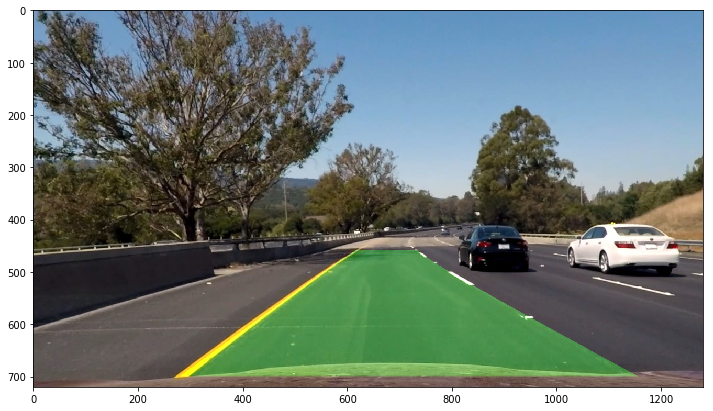

In [60]:
# TODO: Try to make sure that the lanes area goes further
def draw_lanes(warped, undist, left_fitx, right_fitx, ploty):
    # Create an image to draw the lines on
    warp_zero = np.zeros_like(warped).astype(np.uint8)
    color_warp = np.dstack((warp_zero, warp_zero, warp_zero))

    # Recast the x and y points into usable format for cv2.fillPoly()
    pts_left = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
    pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
    pts = np.hstack((pts_left, pts_right))

    # Draw the lane onto the warped blank image
    cv2.fillPoly(color_warp, np.int_([pts]), (0,255, 0))

    # Warp the blank back to original image space using inverse perspective matrix (Minv)
    newwarp = cv2.warpPerspective(color_warp, Minv, (undist.shape[1], undist.shape[0])) 
    # Combine the result with the original image
    result = cv2.addWeighted(undist, 1, newwarp, 0.3, 0)
    return np.array(result)
    #plt.imshow(result)
    
img = mpimg.imread('test_images/test6.jpg')
warped, undist = preprocess(img)
out_img, left_fitx, right_fitx, ploty, ret = fit_polynomial(warped)
lanes_img = draw_lanes(warped, undist, left_fitx, right_fitx, ploty)
plt.figure(figsize=(12, 12))
plt.imshow(lanes_img)

In [284]:
def process_image(img):
#     global img_debug_counter
#     mpimg.imsave('debug/challenge_debug_' + str(img_debug_counter) +'.jpg', img)
#     img_debug_counter += 1
    warped, undist = preprocess(img)
    out_img, left_fitx, right_fitx, ploty, ret = fit_polynomial(warped)
    if ret == False:
        lanes_img = img
    else:    
        lanes_img = draw_lanes(warped, undist, left_fitx, right_fitx, ploty)
        
    return lanes_img

In [62]:
import sys
!conda install --yes --prefix {sys.prefix} requests
from moviepy.editor import VideoFileClip
from IPython.display import HTML

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.4.10
  latest version: 4.5.12

Please update conda by running

    $ conda update -n base conda



# All requested packages already installed.



In [285]:
video_output = 'test_video_output/project_video.mp4'
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
##clip1 = VideoFileClip("test_videos/solidWhiteRight.mp4").subclip(0,5)
clip = VideoFileClip("project_video.mp4")
processed_clip = clip.fl_image(process_image)
%time processed_clip.write_videofile(video_output, audio=False)

[MoviePy] >>>> Building video test_video_output/project_video.mp4
[MoviePy] Writing video test_video_output/project_video.mp4



 12%|█▏        | 152/1261 [00:43<04:14,  4.36it/s]


 24%|██▍       | 303/1261 [01:19<03:16,  4.88it/s]


 36%|███▌      | 454/1261 [01:55<02:49,  4.77it/s]


 48%|████▊     | 605/1261 [02:31<02:37,  4.17it/s]


 60%|█████▉    | 756/1261 [03:05<02:12,  3.80it/s]


 72%|███████▏  | 907/1261 [03:40<01:23,  4.25it/s]


 84%|████████▍ | 1057/1261 [04:16<00:41,  4.86it/s]


 96%|█████████▌| 1205/1261 [04:55<00:14,  3.84it/s]


100%|█████████▉| 1260/1261 [05:10<00:00,  3.81it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: test_video_output/project_video.mp4 

CPU times: user 7min 55s, sys: 10.9 s, total: 8min 5s
Wall time: 5min 12s


In [282]:
video_output = 'test_video_output/challenge_video.mp4'
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
##clip1 = VideoFileClip("test_videos/solidWhiteRight.mp4").subclip(0,5)
img_debug_counter = 0
clip2 = VideoFileClip("challenge_video.mp4")#.subclip(4,6)
processed_clip2 = clip2.fl_image(process_image)
%time processed_clip2.write_videofile(video_output, audio=False)

[MoviePy] >>>> Building video test_video_output/challenge_video.mp4
[MoviePy] Writing video test_video_output/challenge_video.mp4


100%|██████████| 485/485 [06:16<00:00,  1.41it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: test_video_output/challenge_video.mp4 

CPU times: user 7min 6s, sys: 9.38 s, total: 7min 15s
Wall time: 6min 17s


In [286]:
video_output = 'test_video_output/harder_challenge_video.mp4'
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
##clip1 = VideoFileClip("test_videos/solidWhiteRight.mp4").subclip(0,5)
clip2 = VideoFileClip("harder_challenge_video.mp4")
processed_clip2 = clip2.fl_image(process_image)
%time processed_clip2.write_videofile(video_output, audio=False)

[MoviePy] >>>> Building video test_video_output/harder_challenge_video.mp4
[MoviePy] Writing video test_video_output/harder_challenge_video.mp4



 13%|█▎        | 152/1200 [00:36<04:08,  4.22it/s]


 25%|██▌       | 303/1200 [01:15<04:08,  3.62it/s]


 38%|███▊      | 454/1200 [01:52<03:23,  3.67it/s]


 50%|█████     | 605/1200 [02:23<02:16,  4.35it/s]


 63%|██████▎   | 756/1200 [03:00<01:56,  3.82it/s]


 76%|███████▌  | 907/1200 [03:38<01:08,  4.29it/s]


 88%|████████▊ | 1057/1200 [04:14<00:35,  4.03it/s]


100%|█████████▉| 1199/1200 [04:47<00:00,  4.14it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: test_video_output/harder_challenge_video.mp4 

CPU times: user 7min 7s, sys: 7.52 s, total: 7min 15s
Wall time: 4min 50s


In [ ]:
# Some conclusions:
# On the project video the result is good
# On the challenge video detection fails, probably because of high brightness
# On harder challenge lines are detected but they are incorrect



# 2. Percentile selection has helped to produce some output on challenge video. 
# I am not sure about correctness of radius of curvature.
# The quality of project video has gone down. There are some jumps.
# But I will try to implement some smoothing and hopefully that will help both videos.
# Also I want to implement white and yellow enhancement which should allow to increase threshold percentile.
# For yellow here is the idea: select yellow pixels and simply increase their Value channel.
# When performing filtering take only those pixels above some saturation which should discard grey pixels with yellow hue.

# 3. After usage of Y channel from YCrCb and B channel from LAB the project and challenge videos are OK
# Now I will implement smoothing and later add search from previous polynomial
# Also I need to add curvature estimation and see how correct is it.
# On the project video it is visible that right lane leans to the left a bit especially in the end
# I might also try to project more area in the front to estimate curvature better.
# On harder challenge the result is horrible